In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names
file_names = ['./logs/sb3/Air_00_steps_32_batch_64_parallel_8_agents_16_1.csv', './logs/sb3/Air_01_steps_32_batch_64_parallel_8_agents_16_1.csv']

# Load each CSV file into a DataFrame and store them in a list
data_frames = [pd.read_csv(file) for file in file_names]

# Make sure the wall time starts from 0
for df in data_frames:
    df['Wall time'] -= df['Wall time'][0]


In [41]:
data_frames[0].head()

,Wall time,Step,Value
0,0.000000,4096,0.135815
1,2.587070,8192,1.895357
2,5.134122,12288,3.139557
3,7.652763,16384,3.067014
4,10.147267,20480,3.984873


In [42]:
data_frames[1].head()

,Wall time,Step,Value
0,0.000000,4096,0.787722
1,2.602110,8192,1.746233
2,4.972632,12288,3.825282
3,7.522466,16384,5.941506
4,10.045173,20480,7.087479


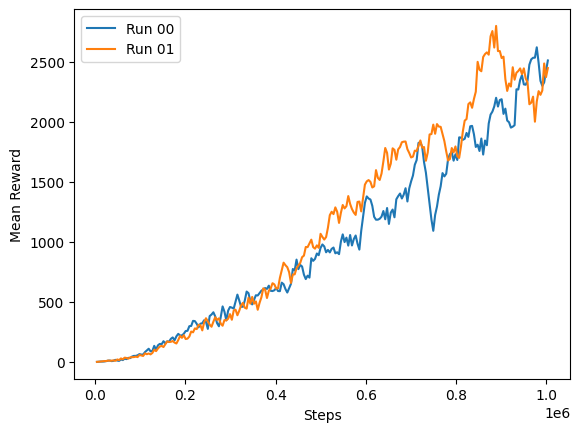

In [43]:
plt.plot(data_frames[0]['Step'], data_frames[0]['Value'], label="Run 00")
plt.plot(data_frames[1]['Step'], data_frames[1]['Value'], label="Run 01")
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")
plt.show()

In [44]:
mean_values = pd.concat(data_frames).groupby(level=0).mean()
mean_values

,Wall time,Step,Value
0,0.000000,4096.0,0.461769
1,2.594590,8192.0,1.820795
2,5.053377,12288.0,3.482419
3,7.587614,16384.0,4.504260
4,10.096220,20480.0,5.536176
...,...,...,...
240,624.198292,987136.0,2283.391846
241,626.827561,991232.0,2280.731689
242,629.429866,995328.0,2407.585083
243,632.076164,999424.0,2398.934570


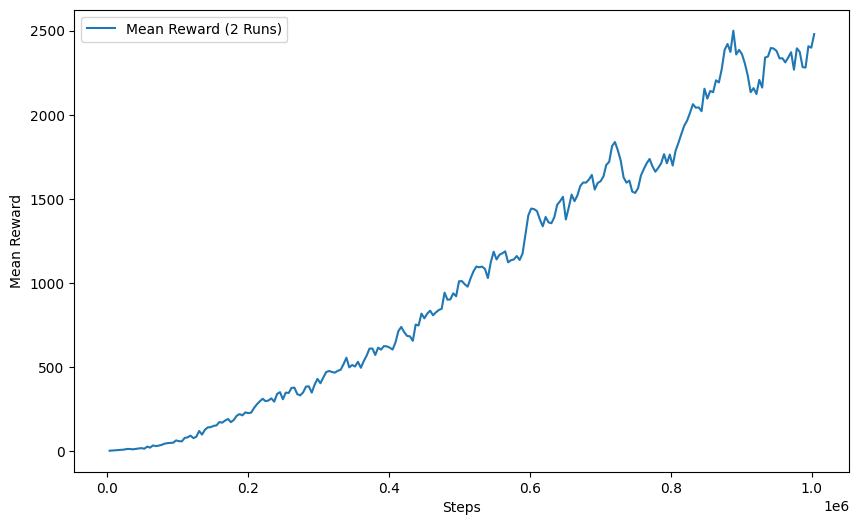

In [45]:
plt.figure(figsize=(10, 6))

# Plot the mean values
plt.plot(mean_values['Step'], mean_values['Value'], label='Mean Reward (2 Runs)')

# Add labels and title
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")

# Show the plot
plt.show()

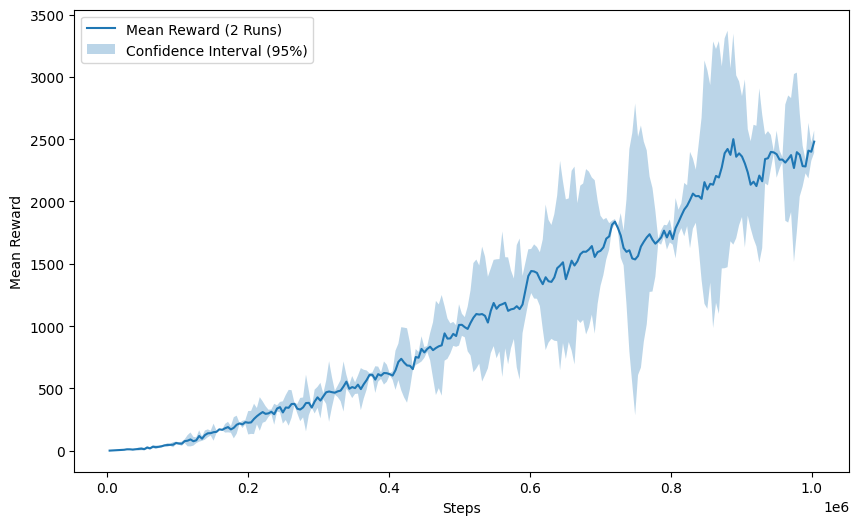

In [50]:

# Calculate the upper and lower bounds for the confidence interval
confidence_level = 0.95
std_values = pd.concat(data_frames).groupby(level=0).std()
lower_bound = mean_values - 2 * std_values
upper_bound = mean_values + 2 * std_values

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the mean values with confidence intervals
plt.plot(mean_values['Step'], mean_values['Value'], label='Mean Reward (2 Runs)')
plt.fill_between(mean_values['Step'], lower_bound['Value'], upper_bound['Value'], alpha=0.3, label='Confidence Interval (95%)')

# Add labels and title
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")

# Show the plot
plt.show()


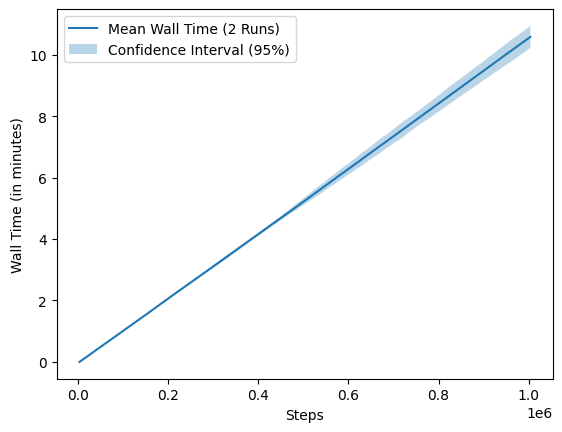

In [51]:
plt.plot(mean_values['Step'], mean_values['Wall time'] / 60, label='Mean Wall Time (2 Runs)')
plt.fill_between(mean_values['Step'], lower_bound['Wall time'] / 60, upper_bound['Wall time'] / 60, alpha=0.3, label='Confidence Interval (95%)')

plt.xlabel("Steps")
plt.ylabel("Wall Time (in minutes)")
plt.legend(loc="upper left")
plt.show()

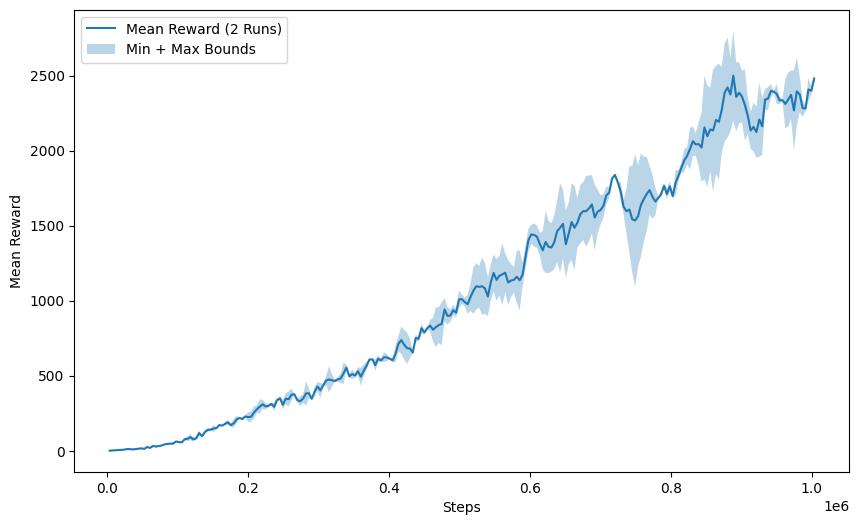

In [52]:
lower_bound_min = pd.concat(data_frames).groupby(level=0).min()
upper_bound_max = pd.concat(data_frames).groupby(level=0).max()

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the mean values with confidence intervals
plt.plot(mean_values['Step'], mean_values['Value'], label='Mean Reward (2 Runs)')
plt.fill_between(mean_values['Step'], lower_bound_min['Value'], upper_bound_max['Value'], alpha=0.3, label='Min + Max Bounds')

# Add labels and title
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")

# Show the plot
plt.show()
